### Importing Libraries

In [6]:
import numpy as np
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

### Loading Model

In [9]:
model = tf.keras.models.load_model("trained_model.h5")
model

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 126, 126, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2  (None, 63, 63, 32)        0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 63, 63, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 61, 61, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 30, 30, 64)        0         
 g2D)                                                   

## Visualizaing Single Image of test set

In [13]:
!pip install opencv-python

   ---------------------------------------- 0.0/38.6 MB ? eta -:--:--
    --------------------------------------- 0.5/38.6 MB 11.3 MB/s eta 0:00:04
    --------------------------------------- 0.7/38.6 MB 7.5 MB/s eta 0:00:06
    --------------------------------------- 0.9/38.6 MB 6.3 MB/s eta 0:00:06
    --------------------------------------- 0.9/38.6 MB 6.5 MB/s eta 0:00:06
    --------------------------------------- 0.9/38.6 MB 6.5 MB/s eta 0:00:06
   - -------------------------------------- 1.0/38.6 MB 3.8 MB/s eta 0:00:10
   - -------------------------------------- 1.6/38.6 MB 4.9 MB/s eta 0:00:08
   - -------------------------------------- 1.8/38.6 MB 4.8 MB/s eta 0:00:08
   -- ------------------------------------- 2.0/38.6 MB 4.7 MB/s eta 0:00:08
   -- ------------------------------------- 2.0/38.6 MB 4.8 MB/s eta 0:00:08
   -- ------------------------------------- 2.0/38.6 MB 4.8 MB/s eta 0:00:08
   -- ------------------------------------- 2.1/38.6 MB 3.7 MB/s eta 0:00:10
   --

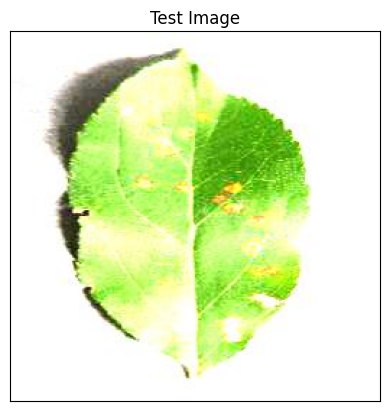

In [16]:
import cv2
image_path = "test/AppleCedarRust1.JPG"
#Reading Image
img = cv2.imread(image_path)
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB) #convert to BGR Image to RGB Image

#Displaying Image
plt.imshow(img)
plt.title("Test Image")
plt.xticks([])
plt.yticks([])
plt.show()

### Testing Model

In [20]:
image = tf.keras.preprocessing.image.load_img(image_path,target_size = (128,128))
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr]) #Convert single image to a batch
print(input_arr.shape)

(1, 128, 128, 3)


In [22]:
prediction = model.predict(input_arr)
prediction,prediction.shape

1/1 [==============================] - 0s 32ms/step


(array([[1.47859359e-13, 1.14522877e-12, 1.00000000e+00, 3.90372549e-14,
         4.72612886e-11, 1.99178989e-11, 2.92325194e-15, 2.50184400e-12,
         1.49694531e-16, 7.58847331e-15, 5.81195296e-18, 3.61258462e-12,
         4.02936385e-14, 1.05571851e-16, 3.55768746e-13, 1.12378303e-12,
         2.00520243e-12, 2.04216933e-14, 1.91620977e-14, 1.04310668e-12,
         2.99929172e-17, 9.47875925e-16, 2.17489804e-14, 1.09596766e-13,
         1.26125178e-16, 2.26240658e-15, 3.82210446e-15, 3.79694748e-16,
         3.48566002e-11, 1.83049279e-12, 6.03331482e-11, 5.78612399e-15,
         1.65719207e-12, 2.44656897e-17, 3.44100547e-11, 7.09296242e-14,
         2.59323016e-14, 2.64325519e-12]], dtype=float32),
 (1, 38))

In [23]:
result_index = np.argmax(prediction)
result_index

2

In [24]:
class_name = ['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_spider_mite',
 'Tomato___Target_Spot',
 'Tomato___Tomato_Yellow_Leaf_Curl_Virus',
 'Tomato___Tomato_mosaic_virus',
 'Tomato___healthy']

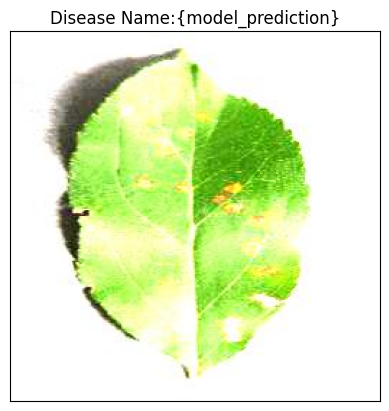

In [27]:
#Displaying Result of disease prediction
model_prediction = class_name[result_index]
plt.imshow(img)
plt.title("Disease Name:{model_prediction}")
plt.xticks([])
plt.yticks([])
plt.show()

In [26]:
model_prediction

'Apple___Cedar_apple_rust'